# 混合カテゴリカル分布(Unigram Mixture)によるクラスタリング
k-meansでは、秋田駅に関する2つのクラスタの違いが明確でなかったが、以下では、
 - 秋田駅から観光地への交通・アクセスのクラスタ
 - 秋田駅付近の名産品・名物料理のクラスタというように解釈できるようになっている。

つまり、この分布モデルは、言語の分布をうまくとらえていると言える。  
（データセットは　create_dataset_forLDA.py で作成。）
 


In [1]:
import pandas as pd
import numpy as np
import em_algorithm

import codecs
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import pickle
import seaborn as sns


with open('dict_inv.pickle', 'rb') as f:
    dict_inv = pickle.load(f)
with open('dataset.pickle', 'rb') as f:
    all_reviews = pickle.load(f)


word_dic = {i:w for w, i in dict_inv.items()}
no_of_topics = 5
em_cat=em_algorithm.em_categorical(all_reviews,dict_inv,no_of_topics)
passes =20
theta,phi,qdk =em_cat.fit(passes)

for row in phi:
    w_dic = {word_dic[i]:np.round(val,3) for i,val in enumerate(row)}
    w_dic_sort = (sorted(w_dic.items(), reverse=True, key=lambda x:x[1]))
    print(w_dic_sort[:20])
   



no of step 1
no of step 2
no of step 3
no of step 4
no of step 5
no of step 6
no of step 7
no of step 8
no of step 9
no of step 10
no of step 11
no of step 12
no of step 13
no of step 14
no of step 15
no of step 16
no of step 17
no of step 18
no of step 19
no of step 20
[('温泉', 0.031), ('部屋', 0.018), ('湯', 0.016), ('ホテル', 0.015), ('露天風呂', 0.015), ('風呂', 0.015), ('宿泊', 0.014), ('利用', 0.013), ('食事', 0.013), ('宿', 0.012), ('秋田', 0.011), ('お湯', 0.009), ('朝食', 0.009), ('料理', 0.008), ('良い', 0.008), ('乳頭', 0.007), ('入浴', 0.007), ('夕食', 0.007), ('日帰り', 0.007), ('浴場', 0.007)]
[('秋田', 0.031), ('味', 0.017), ('駅', 0.015), ('料理', 0.011), ('メニュー', 0.01), ('美味しい', 0.01), ('店内', 0.009), ('注文', 0.009), ('稲庭', 0.009), ('湖', 0.008), ('田沢湖', 0.008), ('美味しかっ', 0.008), ('観光', 0.008), ('ラーメン', 0.007), ('像', 0.007), ('土産', 0.007), ('雰囲気', 0.007), ('鶏', 0.007), ('利用', 0.006), ('名物', 0.006)]
[('駅', 0.038), ('秋田', 0.034), ('ホテル', 0.018), ('利用', 0.015), ('便利', 0.012), ('部屋', 0.011), ('バス', 0.01), ('観光', 0.01), ('

# k-meansのクラスタリング結果と比較する
秋田駅に関連する2つのクラスタの違いはクリアではない。


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import japanize_matplotlib
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
matplotlib.pyplot.rcParams['figure.figsize'] = (18.0, 10.0)
score_df = pd.read_csv("fortravel_bow.csv", encoding='ms932',index_col=0)

vec = KMeans(n_clusters=5)
pred_vec =vec.fit_predict(score_df.iloc[:,3:])
score_df["class"]=pred_vec
centers = vec.cluster_centers_

headers=score_df.columns.tolist()[3:-1]
import codecs
center_top20=[]
for c in centers:
   
    c_dic ={name:np.round(val,1) for name,val in zip(headers, c)}
    top_20 = sorted(c_dic.items(), key = lambda x : x[1],reverse=True)[:20]
    
    print(top_20)
    center_top20.append(top_20)


[('ホテル', 1.7), ('部屋', 0.9), ('利用', 0.6), ('朝食', 0.5), ('秋田', 0.5), ('駅', 0.5), ('宿泊', 0.4), ('ビジネス', 0.3), ('温泉', 0.3), ('風呂', 0.3), ('食事', 0.3), ('バイキング', 0.2), ('バス', 0.2), ('便利', 0.2), ('夕食', 0.2), ('客室', 0.2), ('快適', 0.2), ('料理', 0.2), ('浴場', 0.2), ('清潔', 0.2)]
[('温泉', 2.6), ('湯', 1.2), ('宿', 0.5), ('露天風呂', 0.5), ('乳頭', 0.4), ('宿泊', 0.4), ('部屋', 0.4), ('風呂', 0.4), ('お湯', 0.3), ('利用', 0.3), ('日帰り', 0.3), ('泉', 0.3), ('入浴', 0.2), ('内湯', 0.2), ('料理', 0.2), ('施設', 0.2), ('旅館', 0.2), ('混浴', 0.2), ('温泉郷', 0.2), ('源泉', 0.2)]
[('秋田', 0.2), ('バス', 0.1), ('メニュー', 0.1), ('ラーメン', 0.1), ('レストラン', 0.1), ('像', 0.1), ('公園', 0.1), ('利用', 0.1), ('十和田湖', 0.1), ('味', 0.1), ('土産', 0.1), ('地元', 0.1), ('場所', 0.1), ('多い', 0.1), ('宿泊', 0.1), ('展望', 0.1), ('展示', 0.1), ('山', 0.1), ('建物', 0.1), ('料理', 0.1)]
[('屋敷', 1.6), ('武家', 1.4), ('角館', 1.2), ('桜', 0.7), ('通り', 0.6), ('観光', 0.3), ('場所', 0.2), ('展示', 0.2), ('建物', 0.2), ('時期', 0.2), ('秋田', 0.2), ('蔵', 0.2), ('見学', 0.2), ('館', 0.2), ('駅', 0.2), ('さくら', 0.1),

# Unigram MixtureによるクラスタでPCAプロットを色分けする
全てのクラスタが、意味ベクトルの方向に沿って散らばっている（k-meansでは、クラスタの１つが中央部分に固まっていた）

no of step 1
no of step 2
no of step 3
no of step 4
no of step 5
no of step 6
no of step 7
no of step 8
no of step 9
no of step 10
no of step 11
no of step 12
no of step 13
no of step 14
no of step 15
no of step 16
no of step 17
no of step 18
no of step 19
no of step 20
[('秋田', 0.03), ('駅', 0.02), ('公園', 0.01), ('利用', 0.01), ('城', 0.01), ('場所', 0.01), ('屋敷', 0.01), ('展示', 0.01), ('建物', 0.01), ('施設', 0.01), ('時代', 0.01), ('桜', 0.01), ('武家', 0.01), ('歴史', 0.01), ('無料', 0.01), ('現在', 0.01), ('良い', 0.01), ('見学', 0.01), ('観光', 0.01), ('角館', 0.01)]
[('温泉', 0.04), ('宿', 0.02), ('湯', 0.02), ('露天風呂', 0.02), ('風呂', 0.02), ('お湯', 0.01), ('バス', 0.01), ('ホテル', 0.01), ('乳頭', 0.01), ('入浴', 0.01), ('内湯', 0.01), ('利用', 0.01), ('夕食', 0.01), ('宿泊', 0.01), ('建物', 0.01), ('料理', 0.01), ('施設', 0.01), ('旅館', 0.01), ('日帰り', 0.01), ('泉', 0.01)]
[('ホテル', 0.03), ('秋田', 0.03), ('利用', 0.02), ('朝食', 0.02), ('部屋', 0.02), ('駅', 0.02), ('コンビニ', 0.01), ('バイキング', 0.01), ('バス', 0.01), ('ビジネス', 0.01), ('フロント', 0.01), ('便利'

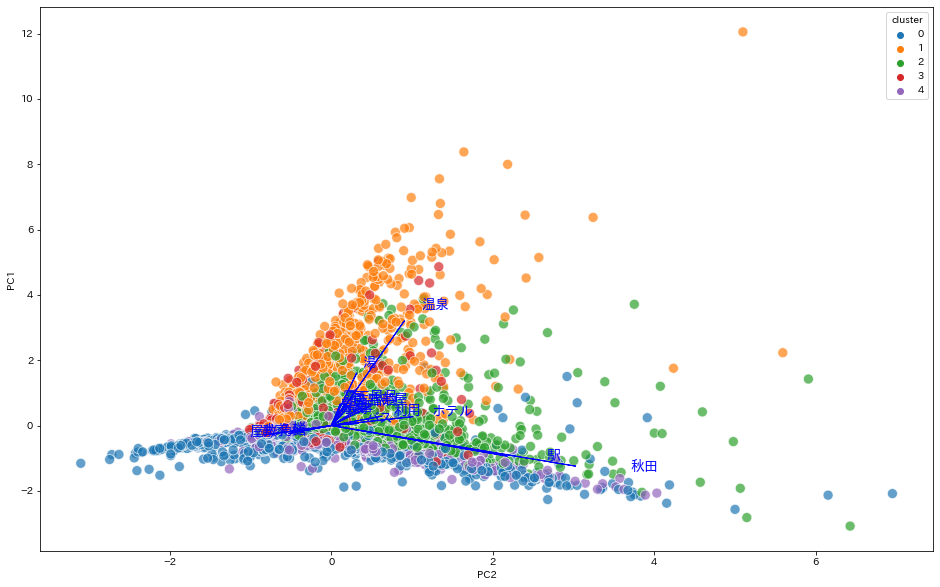

In [1]:
%run mixture_unigram.py

# トピックモデルによるクラスタリング
Unigram Mixtureと比較して、各クラスタ（トピック）は、相互の違いがはっきりする

pass :  0
pass :  1
pass :  2
pass :  3
pass :  4
pass :  5
pass :  6
pass :  7
pass :  8
pass :  9
pass :  10
pass :  11
pass :  12
pass :  13
pass :  14
pass :  15
pass :  16
pass :  17
pass :  18
pass :  19
pass :  20
pass :  21
pass :  22
pass :  23
pass :  24
pass :  25
pass :  26
pass :  27
pass :  28
pass :  29
pass :  30
pass :  31
pass :  32
pass :  33
pass :  34
pass :  35
pass :  36
pass :  37
pass :  38
pass :  39
topic id: 0
[('角館', 0.0362156297935186), ('屋敷', 0.026514695228971184), ('武家', 0.025682053391881194), ('通り', 0.025363316182611725), ('観光', 0.018663984480783564), ('桜', 0.016900597611522825), ('時期', 0.016477125993397183), ('館', 0.01579033387302173), ('建物', 0.014500327318842182), ('展示', 0.013261823769008009), ('客', 0.012149495100479914), ('紅葉', 0.011324328534366938), ('歴史', 0.01126182897301938), ('時代', 0.00990527403717506), ('見学', 0.009433126266830115), ('沿い', 0.00879702774499844), ('有名', 0.008757085161724814), ('雰囲気', 0.008582507783605666), ('散策', 0.0084615639416475

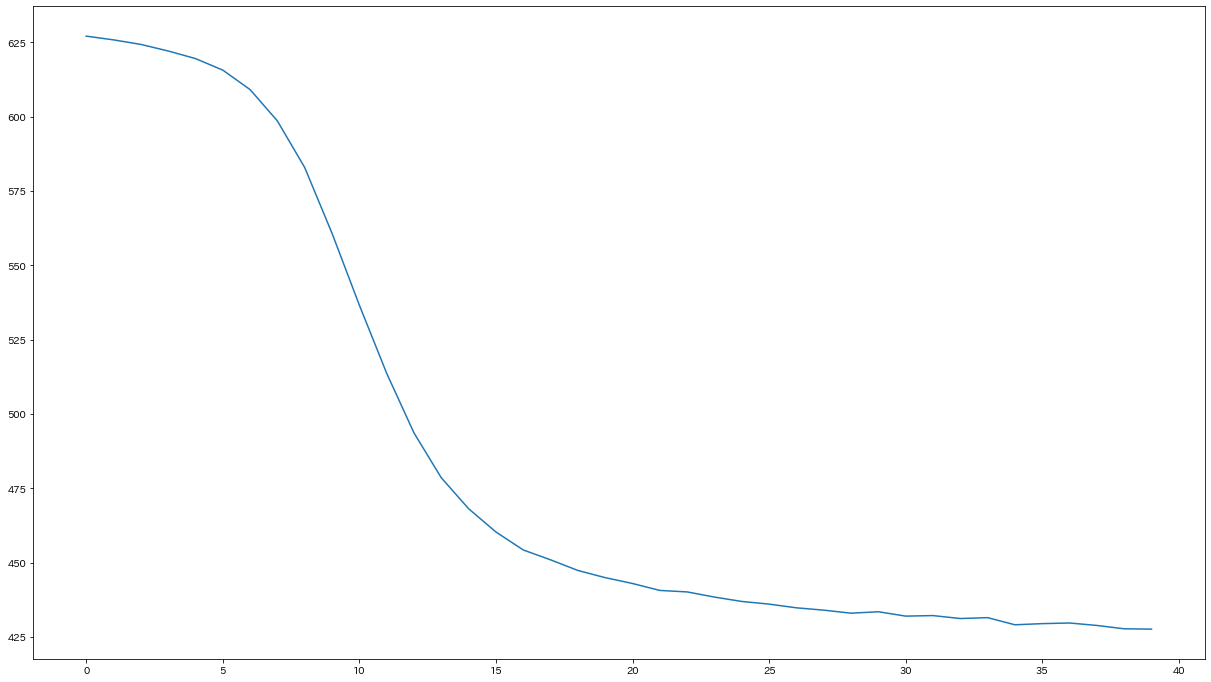

In [6]:
%run vbLDA.py
